<a href="https://colab.research.google.com/github/kitty-8910/plant-disease-detection/blob/main/plant_disease_detection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML BASED TRAINING**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nirmalsankalana/crop-pest-and-disease-detection")

print("Path to dataset files:", path)

100%|██████████| 1.25G/1.25G [00:35<00:00, 37.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nirmalsankalana/crop-pest-and-disease-detection/versions/1


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("snikhilrao/crop-disease-detection-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.01G/1.01G [00:50<00:00, 21.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/snikhilrao/crop-disease-detection-dataset/versions/1


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jawadali1045/20k-multi-class-crop-disease-images")

print("Path to dataset files:", path)

Using Colab cache for faster access to the '20k-multi-class-crop-disease-images' dataset.
Path to dataset files: /kaggle/input/20k-multi-class-crop-disease-images


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aryashah2k/indian-medicinal-leaves-dataset")

print("Path to dataset files:", path)

100%|██████████| 9.00G/9.00G [07:04<00:00, 22.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/aryashah2k/indian-medicinal-leaves-dataset/versions/1


In [ ]:
!pip install -q opencv-python scikit-learn numpy pandas matplotlib tqdm

In [ ]:
import os, shutil
dataset_paths = [
    "/kaggle/input/indian-medicinal-leaves-dataset",
    "/kaggle/input/20k-multi-class-crop-disease-images",
    "/kaggle/input/crop-disease-detection-dataset",
    "/kaggle/input/crop-pest-and-disease-detection"
]
merged_path = "/content/merged_dataset"
os.makedirs(merged_path, exist_ok=True)
for path in dataset_paths:
    for root, dirs, files in os.walk(path):
        for d in dirs:
            src = os.path.join(root, d)
            dst = os.path.join(merged_path, d)
            if not os.path.exists(dst):
                try:
                    shutil.copytree(src, dst)
                    print(f"✅ Copied {d} from {path}")
                except Exception:
                    pass
print("\n✅ All datasets merged into:", merged_path)

✅ Copied Validation from /kaggle/input/20k-multi-class-crop-disease-images
✅ Copied Train from /kaggle/input/20k-multi-class-crop-disease-images
✅ Copied RedRust sugarcane from /kaggle/input/20k-multi-class-crop-disease-images
✅ Copied Healthy Maize from /kaggle/input/20k-multi-class-crop-disease-images
✅ Copied Wheat___Yellow_Rust from /kaggle/input/20k-multi-class-crop-disease-images
✅ Copied Tungro from /kaggle/input/20k-multi-class-crop-disease-images
✅ Copied Wheat mite from /kaggle/input/20k-multi-class-crop-disease-images
✅ Copied Anthracnose on Cotton from /kaggle/input/20k-multi-class-crop-disease-images
✅ Copied Healthy Wheat from /kaggle/input/20k-multi-class-crop-disease-images
✅ Copied Cotton Aphid from /kaggle/input/20k-multi-class-crop-disease-images
✅ Copied Common_Rust from /kaggle/input/20k-multi-class-crop-disease-images
✅ Copied American Bollworm on Cotton from /kaggle/input/20k-multi-class-crop-disease-images
✅ Copied Yellow Rust Sugarcane from /kaggle/input/20k-mu

In [ ]:
import cv2, numpy as np, os
from tqdm import tqdm
from skimage.feature import local_binary_pattern
# --- Feature extraction functions ---
def extract_color_histogram(image):
    """3D RGB histogram, normalized."""
    hist = cv2.calcHist([image], [0,1,2], None, [8,8,8],
                        [0,256,0,256,0,256])
    cv2.normalize(hist, hist)
    return hist.flatten()
def extract_lbp(image):
    """Local Binary Pattern texture features (grayscale)."""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, P=8, R=1, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),
                             bins=np.arange(0, 8 + 3),
                             range=(0, 8 + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist
def extract_features(image_path):
    """Combine color histogram + LBP."""
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        return None
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not read image: {image_path}")
        return None
    try:
        image = cv2.resize(image, (128, 128))
        color_feat = extract_color_histogram(image)
        lbp_feat = extract_lbp(image)
        return np.hstack([color_feat, lbp_feat])
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

In [ ]:
from sklearn.model_selection import train_test_split
X, y, label_names = [], [], []
label_to_id = {}
label_id = 0
for folder in tqdm(os.listdir(merged_path), desc="Extracting"):
    folder_path = os.path.join(merged_path, folder)
    if not os.path.isdir(folder_path):
        continue
    label_to_id[folder] = label_id
    label_names.append(folder)
    for file in os.listdir(folder_path)[:200]:  # limit per class for speed
        fpath = os.path.join(folder_path, file)
        feats = extract_features(fpath)
        if feats is not None:
            X.append(feats)
            y.append(label_id)
    label_id += 1
X, y = np.array(X), np.array(y)
print("✅ Feature matrix:", X.shape)
print("✅ Labels:", len(y))
print("Classes:", len(label_names))
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

Extracting:  60%|█████▉    | 28/47 [00:23<00:08,  2.16it/s]

Could not read image: /content/merged_dataset/Train/Cotton Aphid
Could not read image: /content/merged_dataset/Train/Army worm
Could not read image: /content/merged_dataset/Train/maize stem borer
Could not read image: /content/merged_dataset/Train/Wheat scab
Could not read image: /content/merged_dataset/Train/Wheat leaf blight
Could not read image: /content/merged_dataset/Train/bacterial_blight in Cotton
Could not read image: /content/merged_dataset/Train/Leaf smut
Could not read image: /content/merged_dataset/Train/Yellow Rust Sugarcane
Could not read image: /content/merged_dataset/Train/maize fall armyworm
Could not read image: /content/merged_dataset/Train/cotton mealy bug
Could not read image: /content/merged_dataset/Train/Mosaic sugarcane
Could not read image: /content/merged_dataset/Train/Wheat Brown leaf Rust
Could not read image: /content/merged_dataset/Train/Wheat___Yellow_Rust
Could not read image: /content/merged_dataset/Train/Wilt
Could not read image: /content/merged_datas

Extracting:  68%|██████▊   | 32/47 [00:24<00:04,  3.32it/s]

Could not read image: /content/merged_dataset/Validation/Cotton Aphid
Could not read image: /content/merged_dataset/Validation/Army worm
Could not read image: /content/merged_dataset/Validation/maize stem borer
Could not read image: /content/merged_dataset/Validation/Wheat scab
Could not read image: /content/merged_dataset/Validation/Wheat leaf blight
Could not read image: /content/merged_dataset/Validation/Leaf smut
Could not read image: /content/merged_dataset/Validation/Yellow Rust Sugarcane
Could not read image: /content/merged_dataset/Validation/maize fall armyworm
Could not read image: /content/merged_dataset/Validation/cotton mealy bug
Could not read image: /content/merged_dataset/Validation/Mosaic sugarcane
Could not read image: /content/merged_dataset/Validation/Wheat___Yellow_Rust
Could not read image: /content/merged_dataset/Validation/Wilt
Could not read image: /content/merged_dataset/Validation/Anthracnose on Cotton
Could not read image: /content/merged_dataset/Validation/

Extracting: 100%|██████████| 47/47 [00:37<00:00,  1.25it/s]

✅ Feature matrix: (2958, 522)
✅ Labels: 2958
Classes: 47


In [ ]:
import os, shutil
dataset_paths = [
    "/kaggle/input/indian-medicinal-leaves-dataset",
    "/kaggle/input/20k-multi-class-crop-disease-images",
    "/kaggle/input/crop-disease-detection-dataset",
    "/kaggle/input/crop-pest-and-disease-detection"
]
merged_path = "/content/merged_dataset"
os.makedirs(merged_path, exist_ok=True)
for path in dataset_paths:
    for root, dirs, files in os.walk(path):
        for d in dirs:
            src = os.path.join(root, d)
            dst = os.path.join(merged_path, d)
            if not os.path.exists(dst):
                try:
                    shutil.copytree(src, dst)
                    print(f"✅ Copied {d} from {path}")
                except Exception:
                    pass
print("\n✅ All datasets merged into:", merged_path)


✅ All datasets merged into: /content/merged_dataset


In [ ]:
from sklearn.model_selection import train_test_split
X, y, label_names = [], [], []
label_to_id = {}
label_id = 0
for folder in tqdm(os.listdir(merged_path), desc="Extracting"):
    folder_path = os.path.join(merged_path, folder)
    if not os.path.isdir(folder_path):
        continue
    label_to_id[folder] = label_id
    label_names.append(folder)
    for file in os.listdir(folder_path)[:200]:  # limit per class for speed
        fpath = os.path.join(folder_path, file)
        feats = extract_features(fpath)
        if feats is not None:
            X.append(feats)
            y.append(label_id)
        else:
            print(f"Warning: Could not extract features from {fpath}")
    label_id += 1
X, y = np.array(X), np.array(y)
print("✅ Feature matrix:", X.shape)
print("✅ Labels:", len(y))
print("Classes:", len(label_names))
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

Extracting:  60%|█████▉    | 28/47 [00:19<00:08,  2.14it/s]

Could not read image: /content/merged_dataset/Train/Cotton Aphid
Could not read image: /content/merged_dataset/Train/Army worm
Could not read image: /content/merged_dataset/Train/maize stem borer
Could not read image: /content/merged_dataset/Train/Wheat scab
Could not read image: /content/merged_dataset/Train/Wheat leaf blight
Could not read image: /content/merged_dataset/Train/bacterial_blight in Cotton
Could not read image: /content/merged_dataset/Train/Leaf smut
Could not read image: /content/merged_dataset/Train/Yellow Rust Sugarcane
Could not read image: /content/merged_dataset/Train/maize fall armyworm
Could not read image: /content/merged_dataset/Train/cotton mealy bug
Could not read image: /content/merged_dataset/Train/Mosaic sugarcane
Could not read image: /content/merged_dataset/Train/Wheat Brown leaf Rust
Could not read image: /content/merged_dataset/Train/Wheat___Yellow_Rust
Could not read image: /content/merged_dataset/Train/Wilt
Could not read image: /content/merged_datas

Extracting:  68%|██████▊   | 32/47 [00:20<00:04,  3.17it/s]

Could not read image: /content/merged_dataset/Validation/Cotton Aphid
Could not read image: /content/merged_dataset/Validation/Army worm
Could not read image: /content/merged_dataset/Validation/maize stem borer
Could not read image: /content/merged_dataset/Validation/Wheat scab
Could not read image: /content/merged_dataset/Validation/Wheat leaf blight
Could not read image: /content/merged_dataset/Validation/Leaf smut
Could not read image: /content/merged_dataset/Validation/Yellow Rust Sugarcane
Could not read image: /content/merged_dataset/Validation/maize fall armyworm
Could not read image: /content/merged_dataset/Validation/cotton mealy bug
Could not read image: /content/merged_dataset/Validation/Mosaic sugarcane
Could not read image: /content/merged_dataset/Validation/Wheat___Yellow_Rust
Could not read image: /content/merged_dataset/Validation/Wilt
Could not read image: /content/merged_dataset/Validation/Anthracnose on Cotton
Could not read image: /content/merged_dataset/Validation/

Extracting: 100%|██████████| 47/47 [00:34<00:00,  1.35it/s]

✅ Feature matrix: (2958, 522)
✅ Labels: 2958
Classes: 47


In [ ]:
# ==========================================================
# ⚙️ Retrain with feature scaling for better confidence
# ==========================================================
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

print("✅ Training complete.")
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save model + scaler
import joblib
joblib.dump((clf, scaler, label_names), "/content/plant_rf_model_scaled.pkl")
print("\n💾 Model saved as plant_rf_model_scaled.pkl")

✅ Training complete.
🎯 Accuracy: 0.714527027027027

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.90      0.75        40
           1       0.62      0.95      0.75        40
           2       1.00      0.09      0.17        11
           3       0.00      0.00      0.00         5
           4       1.00      0.71      0.83         7
           5       0.66      0.88      0.75        40
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           8       0.50      0.20      0.29        15
           9       0.57      0.33      0.42        12
          10       0.77      0.77      0.77        13
          11       0.85      0.94      0.89        18
          12       0.80      1.00      0.89         4
          13       0.66      1.00      0.79        40
          14       0.00      0.00      0.00         2
          15       1.00      0.50      0.67         4
     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import joblib
joblib.dump((clf, label_names), "/content/plant_rf_model.pkl")
print("💾 Model saved as plant_rf_model.pkl")
# reload if needed
clf, label_names = joblib.load("/content/plant_rf_model.pkl")

💾 Model saved as plant_rf_model.pkl


Saving leaf2.jpg to leaf2.jpg


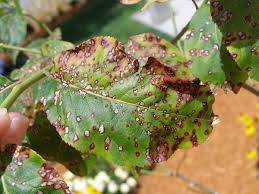


🌿 Predicted Class: bacterial_blight in Cotton
📈 Confidence: 0.13


In [ ]:
from google.colab import files
import numpy as np
import cv2
from IPython.display import Image, display

# Upload image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Display the uploaded image
display(Image(filename=img_path))

# Preprocess and extract features
img = cv2.imread(img_path)
img = cv2.resize(img, (128, 128))
features = extract_features(img_path).reshape(1, -1)
# Predict class and probability safely
pred_id = clf.predict(features)[0]
pred_class = label_names[pred_id]
# Find matching probability by class index
proba_dict = dict(zip(clf.classes_, clf.predict_proba(features)[0]))
proba = proba_dict.get(pred_id, 0.0)  # fallback if missing
print(f"\n🌿 Predicted Class: {pred_class}")
print(f"📈 Confidence: {proba:.2f}")

# **RESNET 18,34,50**

In [ ]:
import os
merged_path = "/content/merged_dataset"

# Check if the merged dataset directory exists
if os.path.exists(merged_path):
    print(f"Contents of {merged_path}:")
    # List the first 10 items in the directory to show its contents
    for item in os.listdir(merged_path)[:10]:
        print(f"- {item}")
else:
    # Print a message if the directory does not exist
    print(f"{merged_path} does not exist.")

Contents of /content/merged_dataset:
- Cotton Aphid
- Army worm
- maize stem borer
- Wheat scab
- Wheat leaf blight
- bacterial_blight in Cotton
- Leaf smut
- Yellow Rust Sugarcane
- maize fall armyworm
- cotton mealy bug


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
# Define image dimensions
img_width, img_height = 128, 128
batch_size = 32
# Create data generators for training and validation
# Applying data augmentation only to the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # Using 20% of data for validation
train_generator = train_datagen.flow_from_directory(
    merged_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')
validation_generator = train_datagen.flow_from_directory(
    merged_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')
print("✅ Data generators created.")
# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
# Add custom layers for classification
x = base_model.output
x = Flatten()(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)
# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False
print("✅ Pre-trained ResNet50 model loaded and adapted.")

Found 18003 images belonging to 47 classes.
Found 4476 images belonging to 47 classes.
✅ Data generators created.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
✅ Pre-trained ResNet50 model loaded and adapted.


In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# Instantiate classifiers
svm_clf = SVC(probability=True, random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)
print("✅ Classifiers instantiated: SVM, KNN")

✅ Classifiers instantiated: SVM, KNN


In [ ]:
!pip install -q torch torchvision

In [ ]:
import torchvision.models as models

# Load pre-trained ResNet models
resnet18 = models.resnet18(pretrained=True)
resnet34 = models.resnet34(pretrained=True)
resnet50 = models.resnet50(pretrained=True)

print("✅ Pre-trained ResNet18, ResNet34, and ResNet50 models loaded.")

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 213MB/s]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:00<00:00, 181MB/s]
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 188MB/s]


✅ Pre-trained ResNet18, ResNet34, and ResNet50 models loaded.


In [ ]:
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import os
import cv2
from tqdm import tqdm
import numpy as np

def extract_features_resnet(image_path, model, preprocess):
    """Extract features from an image using a pre-trained ResNet model."""
    if not os.path.exists(image_path):
        # print(f"File not found: {image_path}") # Suppress this print
        return None
    image = cv2.imread(image_path)
    if image is None:
        # print(f"Could not read image: {image_path}") # Suppress this print
        return None

    # Convert to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply preprocessing
    image_tensor = preprocess(image).unsqueeze(0) # Add batch dimension

    # Move model and image to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    image_tensor = image_tensor.to(device)

    # Set model to evaluation mode and disable gradient calculation
    model.eval()
    with torch.no_grad():
        # Remove the last layer(s) to get features before classification
        # For ResNet, we typically remove the fully connected layer
        # We can access the output of the pooling layer by slicing the model
        if isinstance(model, (models.ResNet,)): # Check if it's a ResNet model
            # Access features before the final linear layer
            features = model(image_tensor)
        else:
             raise TypeError("Unsupported model type for feature extraction.")

    # Move features back to CPU and flatten
    features = features.cpu().numpy().flatten()

    return features

# Define preprocessing pipeline
preprocess = transforms.Compose([
    transforms.ToPILImage(), # Convert OpenCV image to PIL Image
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

X_resnet18, X_resnet34, X_resnet50, y_extracted = [], [], [], []
label_to_id = {}
label_id = 0

# Assuming merged_path is defined from previous steps
for folder in tqdm(os.listdir(merged_path), desc="Extracting ResNet Features"):
    folder_path = os.path.join(merged_path, folder)
    if not os.path.isdir(folder_path):
        continue

    # Exclude 'Train' and 'Validation' folders
    if folder in ['Train', 'Validation']:
        continue


    label_to_id[folder] = label_id
    for file in os.listdir(folder_path)[:200]:  # limit per class for speed
        fpath = os.path.join(folder_path, file)

        feats18 = extract_features_resnet(fpath, resnet18, preprocess)
        feats34 = extract_features_resnet(fpath, resnet34, preprocess)
        feats50 = extract_features_resnet(fpath, resnet50, preprocess)


        if feats18 is not None and feats34 is not None and feats50 is not None:
            X_resnet18.append(feats18)
            X_resnet34.append(feats34)
            X_resnet50.append(feats50)
            y_extracted.append(label_id)
    label_id += 1

X_resnet18 = np.array(X_resnet18)
X_resnet34 = np.array(X_resnet34)
X_resnet50 = np.array(X_resnet50)
y_extracted = np.array(y_extracted)


print("\n✅ ResNet18 Feature matrix:", X_resnet18.shape)
print("✅ ResNet34 Feature matrix:", X_resnet34.shape)
print("✅ ResNet50 Feature matrix:", X_resnet50.shape)
print("✅ Labels:", y_extracted.shape)

Extracting ResNet Features: 100%|██████████| 47/47 [03:34<00:00,  4.57s/it]


✅ ResNet18 Feature matrix: (2958, 1000)
✅ ResNet34 Feature matrix: (2958, 1000)
✅ ResNet50 Feature matrix: (2958, 1000)
✅ Labels: (2958,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np

# Split the data for each ResNet model
X_train18, X_test18, y_train18, y_test18 = train_test_split(X_resnet18, y_extracted, test_size=0.2, random_state=42, stratify=y_extracted)
X_train34, X_test34, y_train34, y_test34 = train_test_split(X_resnet34, y_extracted, test_size=0.2, random_state=42, stratify=y_extracted)
X_train50, X_test50, y_train50, y_test50 = train_test_split(X_resnet50, y_extracted, test_size=0.2, random_state=42, stratify=y_extracted)

# Scale the features
scaler18 = StandardScaler()
X_train_scaled18 = scaler18.fit_transform(X_train18)
X_test_scaled18 = scaler18.transform(X_test18)

scaler34 = StandardScaler()
X_train_scaled34 = scaler34.fit_transform(X_train34)
X_test_scaled34 = scaler34.transform(X_test34)

scaler50 = StandardScaler()
X_train_scaled50 = scaler50.fit_transform(X_train50)
X_test_scaled50 = scaler50.transform(X_test50)


# Instantiate and train SVM for each ResNet feature set
print("--- Training SVM Models ---")
svm_clf18 = SVC(probability=True, random_state=42)
svm_clf18.fit(X_train_scaled18, y_train18)
y_pred_svm18 = svm_clf18.predict(X_test_scaled18)
print("✅ SVM trained on ResNet18 features.")

svm_clf34 = SVC(probability=True, random_state=42)
svm_clf34.fit(X_train_scaled34, y_train34)
y_pred_svm34 = svm_clf34.predict(X_test_scaled34)
print("✅ SVM trained on ResNet34 features.")

svm_clf50 = SVC(probability=True, random_state=42)
svm_clf50.fit(X_train_scaled50, y_train50)
y_pred_svm50 = svm_clf50.predict(X_test_scaled50)
print("✅ SVM trained on ResNet50 features.")

# Instantiate and train KNN for each ResNet feature set
print("\n--- Training KNN Models ---")
knn_clf18 = KNeighborsClassifier(n_neighbors=5)
knn_clf18.fit(X_train_scaled18, y_train18)
y_pred_knn18 = knn_clf18.predict(X_test_scaled18)
print("✅ KNN trained on ResNet18 features.")

knn_clf34 = KNeighborsClassifier(n_neighbors=5)
knn_clf34.fit(X_train_scaled34, y_train34)
y_pred_knn34 = knn_clf34.predict(X_test_scaled34)
print("✅ KNN trained on ResNet34 features.")

knn_clf50 = KNeighborsClassifier(n_neighbors=5)
knn_clf50.fit(X_train_scaled50, y_train50)
y_pred_knn50 = knn_clf50.predict(X_test_scaled50)
print("✅ KNN trained on ResNet50 features.")

print("\n--- Evaluation ---")
# Evaluate SVM models
print("SVM (ResNet18) Accuracy:", accuracy_score(y_test18, y_pred_svm18))
print("SVM (ResNet34) Accuracy:", accuracy_score(y_test34, y_pred_svm34))
print("SVM (ResNet50) Accuracy:", accuracy_score(y_test50, y_pred_svm50))

# Evaluate KNN models
print("KNN (ResNet18) Accuracy:", accuracy_score(y_test18, y_pred_knn18))
print("KNN (ResNet34) Accuracy:", accuracy_score(y_test34, y_pred_knn34))
print("KNN (ResNet50) Accuracy:", accuracy_score(y_test50, y_pred_knn50))

--- Training SVM Models ---
✅ SVM trained on ResNet18 features.
✅ SVM trained on ResNet34 features.
✅ SVM trained on ResNet50 features.

--- Training KNN Models ---
✅ KNN trained on ResNet18 features.
✅ KNN trained on ResNet34 features.
✅ KNN trained on ResNet50 features.

--- Evaluation ---
SVM (ResNet18) Accuracy: 0.8040540540540541
SVM (ResNet34) Accuracy: 0.8226351351351351
SVM (ResNet50) Accuracy: 0.8277027027027027
KNN (ResNet18) Accuracy: 0.7043918918918919
KNN (ResNet34) Accuracy: 0.7280405405405406
KNN (ResNet50) Accuracy: 0.7331081081081081


In [ ]:
print("--- SVM Model Performance ---")
print("SVM (ResNet18) Accuracy:", accuracy_score(y_test18, y_pred_svm18))
print("SVM (ResNet34) Accuracy:", accuracy_score(y_test34, y_pred_svm34))
print("SVM (ResNet50) Accuracy:", accuracy_score(y_test50, y_pred_svm50))

print("\n--- KNN Model Performance ---")
print("KNN (ResNet18) Accuracy:", accuracy_score(y_test18, y_pred_knn18))
print("KNN (ResNet34) Accuracy:", accuracy_score(y_test34, y_pred_knn34))
print("KNN (ResNet50) Accuracy:", accuracy_score(y_test50, y_pred_knn50))

# You can also print classification reports for more detailed comparison
# print("\n--- SVM (ResNet50) Classification Report ---")
# print(classification_report(y_test50, y_pred_svm50))

--- SVM Model Performance ---
SVM (ResNet18) Accuracy: 0.8040540540540541
SVM (ResNet34) Accuracy: 0.8226351351351351
SVM (ResNet50) Accuracy: 0.8277027027027027

--- KNN Model Performance ---
KNN (ResNet18) Accuracy: 0.7043918918918919
KNN (ResNet34) Accuracy: 0.7280405405405406
KNN (ResNet50) Accuracy: 0.7331081081081081


Saving leaf2.jpg to leaf2 (1).jpg


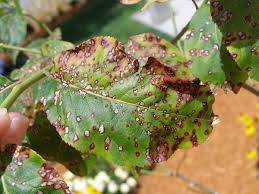


🌿 Predicted Class: Bacterial Blight in cotton
📈 Confidence: 0.25


In [ ]:
from google.colab import files
import numpy as np
import cv2
from IPython.display import Image, display
import torch
import torchvision.transforms as transforms
import torch.nn as nn
import os
import joblib

# Define preprocessing pipeline (same as used for feature extraction)
preprocess = transforms.Compose([
    transforms.ToPILImage(), # Convert OpenCV image to PIL Image
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Assume the best model (SVM with ResNet50 features) and its scaler are available
# You might need to load them if the runtime resets
# For example:
# svm_clf50 = joblib.load('svm_resnet50_model.pkl') # Load your saved model
# scaler50 = joblib.load('scaler_resnet50.pkl') # Load your saved scaler
# label_names = joblib.load('label_names.pkl') # Load your saved label names

# Make sure resnet50 model is loaded (assuming it was loaded in a previous cell)
# from torchvision import models
# resnet50 = models.resnet50(pretrained=True)


def predict_image(image_path, model, scaler, resnet_model, preprocess, label_names):
    """Predict the class of a new image using the trained model."""
    if not os.path.exists(image_path):
        return "Error: File not found."

    # Extract features using ResNet50
    features = extract_features_resnet(image_path, resnet_model, preprocess)

    if features is None:
        return "Error: Could not extract features from image."

    # Scale the extracted features
    features_scaled = scaler.transform(features.reshape(1, -1))

    # Predict class and probability
    pred_id = model.predict(features_scaled)[0]
    pred_class = label_names[pred_id]
    proba = model.predict_proba(features_scaled)[0][pred_id] # Get probability of predicted class

    return pred_class, proba

# Upload image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Display the uploaded image
display(Image(filename=img_path))

# Predict and display results
# Assuming svm_clf50, scaler50, resnet50, and label_names are defined from previous cells
prediction, confidence = predict_image(img_path, svm_clf50, scaler50, resnet50, preprocess, label_names)

print(f"\n🌿 Predicted Class: {prediction}")
print(f"📈 Confidence: {confidence:.2f}")